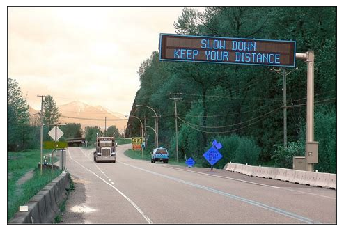

In [2]:
import os 
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

dir_rd = 'C:/git/UW/581-ml/proj/data/test/'
dir_wr = 'C:/git/UW/581-ml/proj/data/curr/'

os.chdir(dir_rd)
im = cv.imread("0008.jpg")
og = output = im.copy()
plt.imshow(im)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.show()

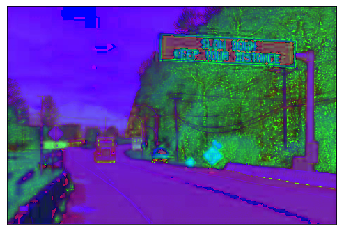

In [3]:
# HSV Color Space???
hsv = cv.cvtColor(im, cv.COLOR_BGR2HSV)

plt.imshow(hsv)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.show()

hsv = cv.GaussianBlur(hsv, (7, 7), 0)

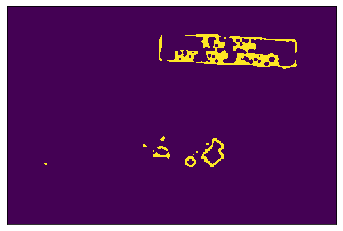

In [4]:
org = cv.inRange(hsv, (10, 50, 20), (30, 255, 255))
plt.imshow(org)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.show()

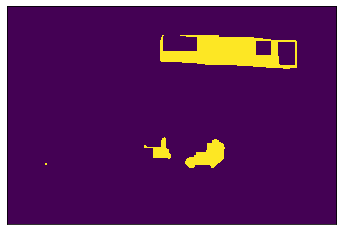

In [5]:
# Dilate - Define a filter (kernal) to process using dilation
krn_dil = np.ones((20, 20), np.uint8)

# getStructuringElement
dil_ = cv.morphologyEx(org, cv.MORPH_CLOSE, krn_dil)
plt.imshow(dil_)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.show()

open_ = dil_

In [6]:
# # Opening - Define a filter (kernal) to process using opening (3x3)
# krn_op = np.ones((10, 10), np.uint8)

# # getStructuringElement
# open_ = cv.morphologyEx(dil_, cv.MORPH_OPEN, krn_op)
# plt.imshow(open_)
# plt.show()

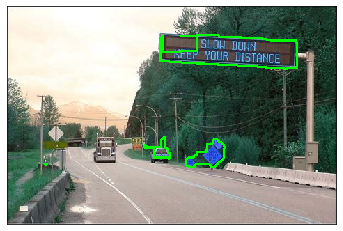

In [7]:
contours, hier = cv.findContours(open_, 
              cv.RETR_EXTERNAL, 
              cv.CHAIN_APPROX_SIMPLE)

if(len(contours) == 0):
    print("Error on {}", i)
#   continue

# Extreme Points
i = 0
for cnt in contours:
    leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
    rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
    topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
    bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])
    cv.drawContours(im, [cnt], 0, (0, 255, 0), 2)
    i += 1
    
# Select Contour
cnt = max(contours, key=cv.contourArea)

x, y, w, h = cv.boundingRect(cnt)
output = output[y:y + h, x:x + w]
plt.imshow(im)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.show()

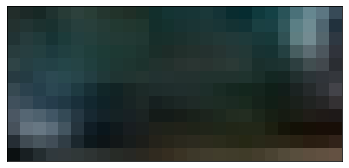

In [88]:
plt.imshow(output)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.show()

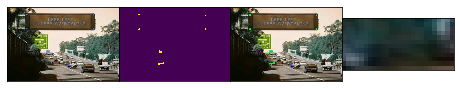

In [89]:
fig = plt.figure(figsize = (8, 8))

plt.subplots_adjust(wspace = 0, hspace=0)
fig.add_subplot(1,4, 1)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.imshow(og)

fig.add_subplot(1,4, 2)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.imshow(open_)

fig.add_subplot(1, 4, 3)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.imshow(im)

fig.add_subplot(1, 4, 4)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
# for ax in fig:
#     ax.set_xticklabels([])
#     ax.set_yticklabels([])
    
plt.imshow(output)

([array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  1.,  4.,  2.,  1.,  2.,  4.,  4.,  1.,  4.,  1.,
          2.,  1.,  1.,  2.,  1.,  0.,  2.,  1.,  2.,  2.,  2.,  0.,  1.,
          1.,  1.,  1.,  0.,  1.,  1.,  1.,  2.,  0.,  2.,  0.,  2.,  0.,
          7.,  7.,  1.,  4.,  4.,  7.,  3.,  3.,  3.,  2.,  2.,  3.,  7.,
          1., 11.,  5.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,
          0.,  0.,  2.,  1.,  3.,  1.,  2.,  0.,  2.,  1.,  1.,  2.,  0.,
          3.,  1.,  1.,  0.,  0.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,

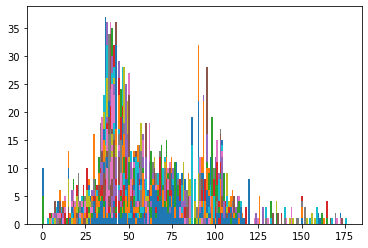

In [17]:
dir_rd = 'C:/git/UW/581-ml/proj/data/cropped/'

os.chdir(dir_rd)
im = cv.imread("0014.jpg")
im = cv.GaussianBlur(im, (15, 15), 0)

og = output = im.copy()
# plt.imshow(im)
# plt.tick_params(left = False, right = False , labelleft = False ,
#                 labelbottom = False, bottom = False)
# plt.show()

gry = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
hsv = cv.cvtColor(im, cv.COLOR_BGR2HSV)

# hist, bin_edges = np.histogram(gry, bins=256, range=(0, 1))

# plt.imshow(gry)
# plt.tick_params(left = False, right = False , labelleft = False ,
#                 labelbottom = False, bottom = False)
im_tmp = hsv[:,:,0]
plt.hist(im_tmp, bins = 180, histtype = 'stepfilled')

In [1]:
%cv inline
img = im
# set number of colors
number = 16

# quantize to 16 colors using kmeans
h, w, c = img.shape
img2 = img.reshape(h*w, c)
kmeans_cluster = cluster.KMeans(n_clusters=number)
kmeans_cluster.fit(img2)
cluster_centers = kmeans_cluster.cluster_centers_
cluster_labels = kmeans_cluster.labels_

# need to scale back to range 0-255 and reshape
img3 = cluster_centers[cluster_labels].reshape(h, w, c)*255.0
img3 = img3.astype('uint8')

cv.imshow('reduced colors',img3)
cv.waitKey(0)
cv.destroyAllWindows()

NameError: name 'im' is not defined

[0 0 0 0 0 0 0 0 0 0]


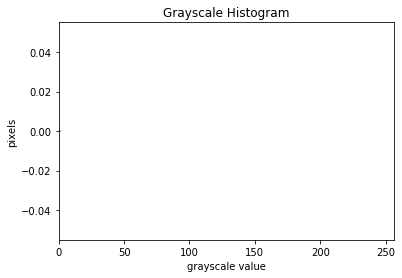

In [97]:
# configure and draw the histogram figure
print(hist[:10])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim([0.0, 256])  # <- named arguments do not work here

plt.plot(bin_edges[0:-1], hist)  # <- or here
plt.show()


In [47]:
import os 
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

dir_rd = 'C:/git/UW/581-ml/proj/data/test/'
dir_wr = 'C:/git/UW/581-ml/proj/data/curr/'

os.chdir(dir_rd)
im = cv.imread("0001.jpg")
og = output = im.copy()
plt.imshow(im)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.show()



output = im
# Slight blur to remove noise and get cleaner edges
im = cv.GaussianBlur(im, (7, 7), 0)

# gry - edge detection
gry = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

gry[gry > 80] = 255

# drop pixels down to 0 min
gry = gry - np.min(gry)

# remove max values to mean for thresholding
gry[gry == np.max(gry)] = np.average(gry)
gry = np.array(gry, np.uint8)

# subtract 1 sigma from the mean
thresh = cv.adaptiveThreshold(gry, 255, 
                             cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                             cv.THRESH_BINARY_INV,
                             101,
                             np.average(gry) * 0.08)

# # Opening - Define a filter (kernal) to process using opening (3x3)
# adaptive kernel based on image size?
krn = np.ones((20, 20), np.uint8)

# getStructuringElement - Close image, then open
close = cv.morphologyEx(thresh, cv.MORPH_CLOSE, krn)

open_ = cv.morphologyEx(close, cv.MORPH_OPEN, krn)

mask = cv.bitwise_and(open_, close)
# mask = close

contours, hier = cv.findContours(mask, 
              cv.RETR_EXTERNAL, 
              cv.CHAIN_APPROX_NONE)

# use FLOODFILL to fill in like pixels / group like pixels
# contours, hier = cv.findContours(mask,
#                   cv.RETR_FLOODFILL,
#                   cv.CHAIN_APPROX_SIMPLE)

# test for empty contours and continue if needed - print to console error
if(len(contours) == 0):
  print("Error on {}", filename)
  continue

# Extreme Points
i = 0
for cnt in contours:
  # leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
  # rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
  # topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
  # bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])
  data.append((filename, i))
  x, y, w, h = cv.boundingRect(cnt)
  tmp = output[y:y + h, x:x + w]
  cv.imwrite(str(filename[:-4] + "_" + str(i) + ".png"), tmp)
  # cv.drawContours(im, [cnt], 0, (0, 255, 0), 2)
  i += 1

# cv.imwrite(filename, output)

# cv.imshow("Original Image", im)
# cv.imshow("Greyscale Image", gry)
# cv.imwrite(str("gray_" + filename), gry)
# cv.imshow("Threshold Image", thresh)
# cv.imshow("Merged Image", merge)
# cv.imshow("Dilated Image", close)
# cv.imshow("Eroded Image", open)
# cv.imshow("Mapped Image", mask)
# cv.imwrite(str("merge_" + filename), mask)
# cv.imshow("contoured", im)
# cv.imwrite(str("contoured_" + filename), im)
# cv.imshow("Cropped", output)

# cv.waitKey(0)
# cv.destroyAllWindows()

# Write Contour information to file
with open('shapeDetect.txt', 'w') as f :
   write = csv.writer(f)
   write.writerows(data)